#### What?

Using data-driven methods to classify reactions in different categories. 

#### Why?

Categorically sorting (new) reactions can help with better documentation and developing a broader understanding of mechanisms possibles in the reactions. 

#### How?

A chemical reaction is descirbed using a three-level reaction ontology based on the hierarchy proposed by Carey, Laffan, Thomson and Williams in 2006.

In this scheme, every reaction is grouped using 3 layers of information: superclass >> class >> type

Fo example: Suzuki reaction is as follows: 

```
"3 Carbon-Carbon bond formation" (Superclass)
    |- "3.1. Suzuki coupling" (Class)
        |- 3.1.1 Bromo OR 3.1.2 Chloro OR 3.1.3 Iodo Suzuki Coupling (Type)
    |- "3.5 Palladium-catalyzed C-C bond formation" (Class) 
        |- 3.5.3 Negishi coupling (Type)
```

Researchers at [NextMove software](https://www.nextmovesoftware.com/namerxn.html) were among the first groups to scrap US Patent literature for chemical reactions and use the categories defined above to systematically classify the reactions. 

Another important step in this process is the atom-atom mapping of the chemical reactions. While not a crucial step (as newer algorithms can perform this task without explicit atom-mapping) it is an important pre-processing standardization operation. 

Atom-atom mapping helps to understand which reactant atom becomes which product atom during the reaction. From this information it is possible to identify reaction centers and sets of bonds made and broken during the reaction. 

This is also useful in distinguishing reactants and products. 

**By convention:**

Reactant: Contribute one more more atoms to the product 

Reagents (solvent, catalyst): Do not contribute any atom to the product(s)

Relevant papers in this field can be found [here](https://pgg1610.github.io/blog_fastpages/chemical-science/machine-learning/resources/2021/05/08/Cheminformatics_Resources.html#computer-aided-synthesis-planning-casp)

Using the Schneider et. al. paper for reference - 
https://pubs.acs.org/doi/10.1021/ci5006614

In [2]:
import os 
import pandas as pd 
import numpy as np 

In [3]:
import rdkit
from rdkit import Chem 
from rdkit.Chem import AllChem
from rdkit.Chem import Draw 
from rdkit.Chem.Draw import IPythonConsole 
from IPython.display import Image

IPythonConsole.ipython_useSVG=True 

In [4]:
try: 
    import cPickle as pickle 
except: 
    import pickle 

In [5]:
# View reactions 
def display_rxn(rxn_smarts):
    rxn = AllChem.ReactionFromSmarts(rxn_smarts,useSmiles=True)
    d2d = Draw.MolDraw2DCairo(800,200)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    return Image(png)

In [6]:
# Mute all errors except critical
Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [8]:
# Data directories 
data_dir = 'DATA/Schneider_etal_ChemReactionClassification/data'

In [9]:
# reaction types
with open(os.path.join(data_dir, 'reactionTypes_training_test_set_patent_data.pkl'), 'rb') as f: 
    reaction_types = pickle.load(f)

# reaction classification data
with open(os.path.join(data_dir, 'names_rTypes_classes_superclasses_training_test_set_patent_data.pkl'), 'rb') as f: 
    names_rTypes = pickle.load(f)

In [10]:
len(reaction_types)

50

names_rTypes is a super set of all possible reaction there are 

In [11]:
names_rTypes

{'3.1.1': 'Bromo Suzuki coupling',
 '6.1.5': 'N-Bn deprotection',
 '3.1.6': 'Chloro Suzuki-type coupling',
 '3.1.5': 'Bromo Suzuki-type coupling',
 '6.1.1': 'N-Boc deprotection',
 '9.1.6': 'Hydroxy to chloro',
 '7.2': 'Amide to amine reduction',
 '7.3': 'Cyano or imine to amine',
 '7.1': 'Nitro to amine reduction',
 '6.3': 'ROH deprotections',
 '6.2': 'RCO2H deprotections',
 '6.1': 'NH deprotections',
 '7.9': 'Other reductions',
 '6.1.3': 'N-Cbz deprotection',
 '10.1': 'Halogenation',
 '10.2': 'Nitration',
 '10.4': 'Other functional group addition',
 '1.6.2': 'Bromo N-alkylation',
 '1.6.4': 'Chloro N-alkylation',
 '8': 'Oxidations',
 '1.6.8': 'Iodo N-alkylation',
 '1.7.7': 'Mitsunobu aryl ether synthesis',
 '1.8.5': 'Thioether synthesis',
 '10.1.1': 'Bromination',
 '10.1.2': 'Chlorination',
 '10.1.5': 'Wohl-Ziegler bromination',
 '9.3.1': 'Carboxylic acid to acid chloride',
 '7.9.2': 'Carboxylic acid to alcohol reduction',
 '3.4': 'Stille reaction',
 '3.3': 'Sonogashira reaction',
 '3.

In [12]:
# Loading the rxn files  
import gzip 
infile = gzip.open( os.path.join(data_dir, 'training_test_set_patent_data.pkl.gz'), 'rb' )

In [13]:
rxn_data_list = []

lineNo = 0
while True:
    lineNo+=1
    
    try:
        smi,lbl,klass = pickle.load(infile) 
        
    except EOFError:
        break
        
    rxn_data_list.append([smi,lbl,klass])
    
    if lineNo%10000 == 0:
        print("Done "+str(lineNo))        

Done 10000
Done 20000
Done 30000
Done 40000
Done 50000


In [14]:
len(rxn_data_list)

50000

## Viewing it as Pandas dataframe 

In [15]:
column_names = ['SMILES', 'Patent No', 'Rxn Class']
df_rxn = pd.DataFrame(rxn_data_list, columns=column_names)

In [16]:
df_rxn

,SMILES,Patent No,Rxn Class
0,[CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...,US06887874,6.1.5
1,O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...,US07056926,7.1.1
2,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...,US08492378,1.8.5
3,Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....,US08592454,2.2.3
4,[CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...,US06716851,1.3.7
...,...,...,...
49995,[BH4-].[Na+].[CH3:25][O:24][c:19]1[cH:18][c:17...,US08324216,7.3.1
49996,[BH4-].[Na+].[N:30]#[C:29][c:26]1[cH:25][cH:24...,US07595398,7.3.1
49997,[N:15]#[C:14][CH2:13][c:1]1[cH:2][n:3][n:4]2[c...,US08273761,7.3.1
49998,B.Cl.CO.[CH3:12][C:8]([OH:13])([CH2:9][C:10]#[...,US08609849,7.3.1


In [17]:
df_rxn.dtypes

SMILES       object
Patent No    object
Rxn Class    object
dtype: object

In [18]:
df_rxn['Rxn Class'].value_counts()

6.1.5     1000
3.3.1     1000
1.3.8     1000
1.3.6     1000
3.1.5     1000
6.2.3     1000
3.4.1     1000
6.1.3     1000
1.7.6     1000
10.1.2    1000
9.1.6     1000
10.1.5    1000
10.4.2    1000
7.1.1     1000
6.3.1     1000
1.7.7     1000
7.9.2     1000
8.1.5     1000
1.7.4     1000
7.2.1     1000
8.1.4     1000
8.2.1     1000
7.3.1     1000
2.1.7     1000
9.3.1     1000
6.1.1     1000
6.3.7     1000
2.1.2     1000
1.8.5     1000
2.2.3     1000
1.3.7     1000
1.7.9     1000
6.2.2     1000
2.7.2     1000
2.6.1     1000
1.6.8     1000
3.1.1     1000
1.6.2     1000
1.2.1     1000
1.6.4     1000
1.2.5     1000
2.3.1     1000
5.1.1     1000
10.1.1    1000
2.1.1     1000
2.6.3     1000
6.2.1     1000
10.2.1    1000
1.2.4     1000
3.1.6     1000
Name: Rxn Class, dtype: int64

In [19]:
df_rxn.iloc[42069]

SMILES       [H][H].[O:32]=[C:18]1[NH:17][C:16](=[O:33])[C@...
Patent No                                           US08377927
Rxn Class                                                6.3.1
Name: 42069, dtype: object

In [20]:
df_rxn.SMILES[42069]

'[H][H].[O:32]=[C:18]1[NH:17][C:16](=[O:33])[C@@H:15]([c:12]2[cH:11][cH:10][c:9]([O:8]Cc3ccccc3)[cH:14][cH:13]2)[C@@H:19]1[c:20]1[cH:21][n:22]2[c:31]3[c:30]1[cH:29][cH:28][cH:27][c:26]3[CH2:25][CH2:24][CH2:23]2>>[O:32]=[C:18]1[NH:17][C:16](=[O:33])[C@@H:15]([c:12]2[cH:13][cH:14][c:9]([OH:8])[cH:10][cH:11]2)[C@@H:19]1[c:20]1[cH:21][n:22]2[c:31]3[c:30]1[cH:29][cH:28][cH:27][c:26]3[CH2:25][CH2:24][CH2:23]2'

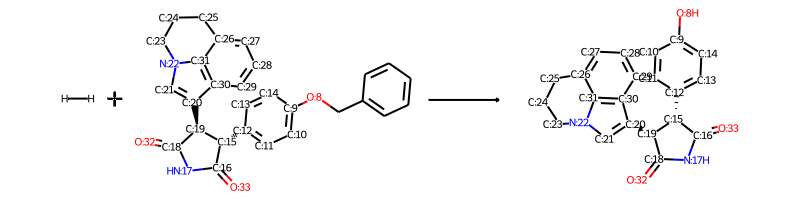

In [21]:
display_rxn(df_rxn.SMILES[42069])

Generate Chemical Entries object in Rdkit from the RXN SMILES

In [22]:
%%time 
# Convert Smiles strings to reaction objects - this takes the most time and might be helpful if parallelized 
from rdkit.Chem import rdChemReactions # Main reaction analysis class 
df_rxn['rxn_obj'] = df_rxn['SMILES'].apply(rdChemReactions.ReactionFromSmarts)

CPU times: user 13.9 s, sys: 1.61 s, total: 15.5 s
Wall time: 15.5 s


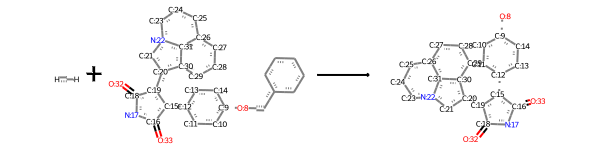

In [23]:
df_rxn['rxn_obj'][42069]

In [24]:
temp_rxn = df_rxn['rxn_obj'][42069]

In [25]:
type(temp_rxn)

rdkit.Chem.rdChemReactions.ChemicalReaction

# Fingerprints in RDkit 

More information here: https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf

Base reaction class in RDKit reaction class now moved to a new class name: http://rdkit.org/docs/source/rdkit.Chem.rdChemReactions.html

Here I am using Reaction Difference FPs for converting to FPs - another option is to use the Transformation FPs 


| Fingerprint Type | Meaning |
|-|-|
| Difference FPs | Take difference of structural FPs of reactant and product | 
| Structural FPs | Concatenate the FPs of reactant and product in 1 vector |

Another option: 
- Adding in agent during the fingerprint generation -- weighting its importance 
- Appending the agent after the FP formation


In [26]:
# Check to see if you can convert this to RDkit FPs  
AllChem.ReactionFingerprintParams()

In [27]:
Chem.rdChemReactions.ReactionFingerprintParams()

In [28]:
rdChemReactions.CreateDifferenceFingerprintForReaction(temp_rxn)

### Function to include agent in the FPs

In [29]:
# Featurize the agents in the rxn 
## This is taken from the paper SI 

def create_agent_feature_FP(rxn):    
    rxn.RemoveUnmappedReactantTemplates()
    agent_feature_Fp = [0.0]*9
    
    for nra in range(rxn.GetNumAgentTemplates()):
        mol = rxn.GetAgentTemplate(nra)
        mol.UpdatePropertyCache(strict=False)
        Chem.GetSSSR(mol)
        
        try:
            ri = mol.GetRingInfo()
            agent_feature_Fp[0] += Descriptors.MolWt(mol)
            agent_feature_Fp[1] += mol.GetNumAtoms()
            agent_feature_Fp[2] += ri.NumRings()
            agent_feature_Fp[3] += Descriptors.MolLogP(mol)
            agent_feature_Fp[4] += Descriptors.NumRadicalElectrons(mol)
            agent_feature_Fp[5] += Descriptors.TPSA(mol)
            agent_feature_Fp[6] += Descriptors.NumHeteroatoms(mol)
            agent_feature_Fp[7] += Descriptors.NumHAcceptors(mol)
            agent_feature_Fp[8] += Descriptors.NumHDonors(mol)
        except:
            continue 
            
    return agent_feature_Fp

def create_agent_morgan2_FP(rxn):    
    rxn.RemoveUnmappedReactantTemplates()
    morgan2 = None
    
    for nra in range(rxn.GetNumAgentTemplates()):
        mol = rxn.GetAgentTemplate(nra)
        mol.UpdatePropertyCache(strict=False)
        Chem.GetSSSR(mol)
        try:
            mg2 = AllChem.GetMorganFingerprint(mol,radius=2)
            if morgan2 is None and mg2 is not None:
                morgan2 = mg2
            elif mg2 is not None:
                morgan2 += mg2
        except:
            print("Cannot build agent Fp\n")
    
    if morgan2 is None: 
        morgan2 = DataStructs.UIntSparseIntVect(2048)
        
    return morgan2

# Include agents in the fingerprint as either a reactant or product
## Inputs are reaction object, fp_type object, int, int

# Create dictionary of all Molecular Fingerprinting types with names
fptype_dict = {"AtomPairFP": AllChem.FingerprintType.AtomPairFP,
               "MorganFP": AllChem.FingerprintType.MorganFP, 
               "TopologicalFP": AllChem.FingerprintType.TopologicalTorsion, 
               "PatternFP": AllChem.FingerprintType.PatternFP, 
               "RDKitFP": AllChem.FingerprintType.RDKitFP}

# Construct a difference fingerprint for a ChemicalReaction by subtracting the reactant fingerprint from the product fingerprint
def diff_fpgen(rxn, fptype_dict = fptype_dict, fp_type = 'MorganFP', include_agent=True, agent_weight=1, nonagent_weight=10):
    params = rdChemReactions.ReactionFingerprintParams()
    params.fptype = fptype_dict[fp_type]
    params.includeAgents = include_agent
    
    if include_agent == True: 
        '''
        If including agent then how is it weighted? 
        '''
        params.agentWeight = agent_weight
        params.nonAgentWeight = nonagent_weight
        
    fp = rdChemReactions.CreateDifferenceFingerprintForReaction(rxn,params)
    return fp

### Function to convert sparse to numpy array

In [30]:
from rdkit import DataStructs
def fingerprint2Numpy(FPs):
    fp_np = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(FPs, fp_np)
    return fp_np

# convert a hashed SparseIntvect into a numpy float vector
def hashedFPToNPfloat(fp,fpsz=2048):
    nfp = np.zeros((fpsz,), float)
    for idx,v in fp.GetNonzeroElements().items():
        nfp[idx]+=float(v)
    return nfp

## Convert the rxn objects to FPs and save pickle

In [31]:
df_rxn.sample(2)

,SMILES,Patent No,Rxn Class,rxn_obj
37512,[OH-].[Na+].Cl.[K+].[BH3-]C#N.[CH3:5][CH2:4][N...,US06964966,1.2.5,<rdkit.Chem.rdChemReactions.ChemicalReaction o...
934,[OH-].[K+].[CH3:14][C@H:5]([CH2:6][c:7]1[cH:8]...,05166218,1.7.9,<rdkit.Chem.rdChemReactions.ChemicalReaction o...


In [32]:
%%time
df_rxn['FP_Morgan_wo_agents'] = df_rxn['rxn_obj'].apply(diff_fpgen)

CPU times: user 18.5 s, sys: 1.05 s, total: 19.5 s
Wall time: 19.6 s


Adding in agents is giving me problem right now - debug it eventually 

## Make training and test set 

In [33]:
%%time 
X_FPs = np.array( [hashedFPToNPfloat(x) for x in df_rxn['FP_Morgan_wo_agents']] )

CPU times: user 3.38 s, sys: 591 ms, total: 3.97 s
Wall time: 4 s


In [39]:
Y_class = np.array( df_rxn['Rxn Class'] )

In [40]:
rtypes = sorted(list(reaction_types))

In [49]:
rtype_int = [int(''.join(entry.split('.'))) for entry in rtypes]

In [52]:
len(set(rtype_int))

50

Note on multi-class classification: 

https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification

LabelBinarizer is not needed if you are using an estimator that already supports multiclass data.

https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

### Option 1: OHE

Create one hot encoding -- does it help to create OHE now? Not sure but doing it here as a first pass. 

### Option 2: Leave as is 

In [56]:
leave_as_is = True 
if leave_as_is == True:
    Y_target = Y_class
else: 
    Y_target = Y_class_OHE 

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

In [59]:
for train_idx, test_idx in stratSplit.split(X_FPs, Y_target):
    X_train = X_FPs[train_idx]
    Y_train = Y_target[train_idx]
    
    X_test = X_FPs[test_idx]
    Y_test = Y_target[test_idx]

# Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=200,n_estimators=250,random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=200, n_estimators=250, random_state=42)

In [61]:
Y_test_predict = model.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
report_real = classification_report(Y_test, Y_test_predict, output_dict=True)
cmat_real = confusion_matrix(Y_test,Y_test_predict)

In [79]:
sum(cmat_real,0)

array([488, 517, 503, 515, 508, 494, 498, 473, 503, 529, 489, 442, 510,
       500, 480, 475, 504, 498, 475, 520, 476, 489, 502, 503, 519, 503,
       498, 479, 521, 495, 500, 497, 484, 534, 515, 516, 498, 494, 502,
       534, 499, 509, 506, 501, 503, 496, 498, 497, 504, 507])

In [96]:
from sklearn import metrics
# evaluate model calculating recall, precision and F-score, return the confusion matrix
def evaluateModel(_model, _testFPs, _test_rxn_labels, _sorted_rxn_label, _names_rTypes):
    
    preds = _model.predict(_testFPs)
    
    #pred_class = [ int(np.argmax(pred_entry)) for pred_entry in preds ]
    #testReactionTypes_class = [ int(np.argmax(test_entry))for test_entry in testReactionTypes ]

    cmat = metrics.confusion_matrix(_test_rxn_labels, preds)
    
    colCounts = sum(cmat,0)
    rowCounts = sum(cmat,1)

    print('%2s %7s %7s %7s     %s'%("ID","recall","prec","F-score ","reaction class"))
    
    sum_recall=0
    sum_prec=0
    
    for i, rxn_class_label in enumerate(_sorted_rxn_label):
        
        recall = 0
        if rowCounts[i] > 0:
            recall = float(cmat[i,i])/rowCounts[i]
        sum_recall += recall
        
        prec = 0
        if colCounts[i] > 0:
            prec = float(cmat[i,i])/colCounts[i]
        sum_prec += prec
        
        f_score = 0
        if (recall + prec) > 0:
            f_score = 2 * (recall * prec) / (recall + prec)   
        
        print('%2d % .4f % .4f % .4f % 9s %s'%(i, recall, prec, f_score,  rxn_class_label, _names_rTypes[rxn_class_label]))
    
    mean_recall = sum_recall/len(_sorted_rxn_label)
    mean_prec = sum_prec/len(_sorted_rxn_label)
    
    if (mean_recall + mean_prec) > 0:
        mean_fscore = 2*(mean_recall*mean_prec)/(mean_recall+mean_prec)
    
    print("Mean:% 3.2f % 7.2f % 7.2f"%(mean_recall,mean_prec,mean_fscore))
    
    return cmat

In [97]:
cmat_rFP_agentFeature = evaluateModel(model, X_test, Y_test, rtypes, names_rTypes)

ID  recall    prec F-score      reaction class
 0  0.9939  0.9959  0.9949     1.2.1 Aldehyde reductive amination
 1  0.9459  0.9478  0.9469     1.2.4 Eschweiler-Clarke methylation
 2  0.9821  0.9841  0.9831     1.2.5 Ketone reductive amination
 3  0.9516  0.9534  0.9525     1.3.6 Bromo N-arylation
 4  0.9666  0.9685  0.9676     1.3.7 Chloro N-arylation
 5  0.9818  0.9838  0.9828     1.3.8 Fluoro N-arylation
 6  0.9639  0.9659  0.9649     1.6.2 Bromo N-alkylation
 7  0.9810  0.9831  0.9820     1.6.4 Chloro N-alkylation
 8  0.9365  0.9384  0.9374     1.6.8 Iodo N-alkylation
 9  0.9245  0.9263  0.9254     1.7.4 Hydroxy to methoxy
10  0.9837  0.9857  0.9847     1.7.6 Methyl esterification
11  0.9865  0.9887  0.9876     1.7.7 Mitsunobu aryl ether synthesis
12  0.9413  0.9431  0.9422     1.7.9 Williamson ether synthesis
13  0.9900  0.9920  0.9910     1.8.5 Thioether synthesis
14  0.9854  0.9875  0.9865    10.1.1 Bromination
15  0.9874  0.9895  0.9884    10.1.2 Chlorination
16  0.9901  0.9921

In [34]:
def labelled_cmat(cmat, labels, figsize=(20,15), labelExtras=None, dpi=300, threshold=0.01, xlabel=True, ylabel=True, rotation=90):
    
    rowCounts = np.array(sum(cmat,1),dtype=float)
    cmat_percent = cmat / rowCounts[:,None]
    
    #zero all elements that are less than 1% of the row contents
    ncm = cmat_percent*(cmat_percent>threshold)

    fig, ax = plt.subplots(1,1, figsize=figsize)
    pax=ax.pcolor(ncm,cmap=cm.ocean_r)
    ax.set_frame_on(True)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(cmat.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(cmat.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    if labelExtras is not None:
        labels = [' %s %s'%(x,labelExtras[x].strip()) for x in labels]
    
    ax.set_xticklabels([], minor=False) 
    ax.set_yticklabels([], minor=False)

    if xlabel:
        ax.set_xticklabels(labels, minor=False, rotation=rotation, horizontalalignment='left') 
    if ylabel:
        ax.set_yticklabels(labels, minor=False)

    ax.grid(True)
    fig.colorbar(pax)
    plt.axis('tight')

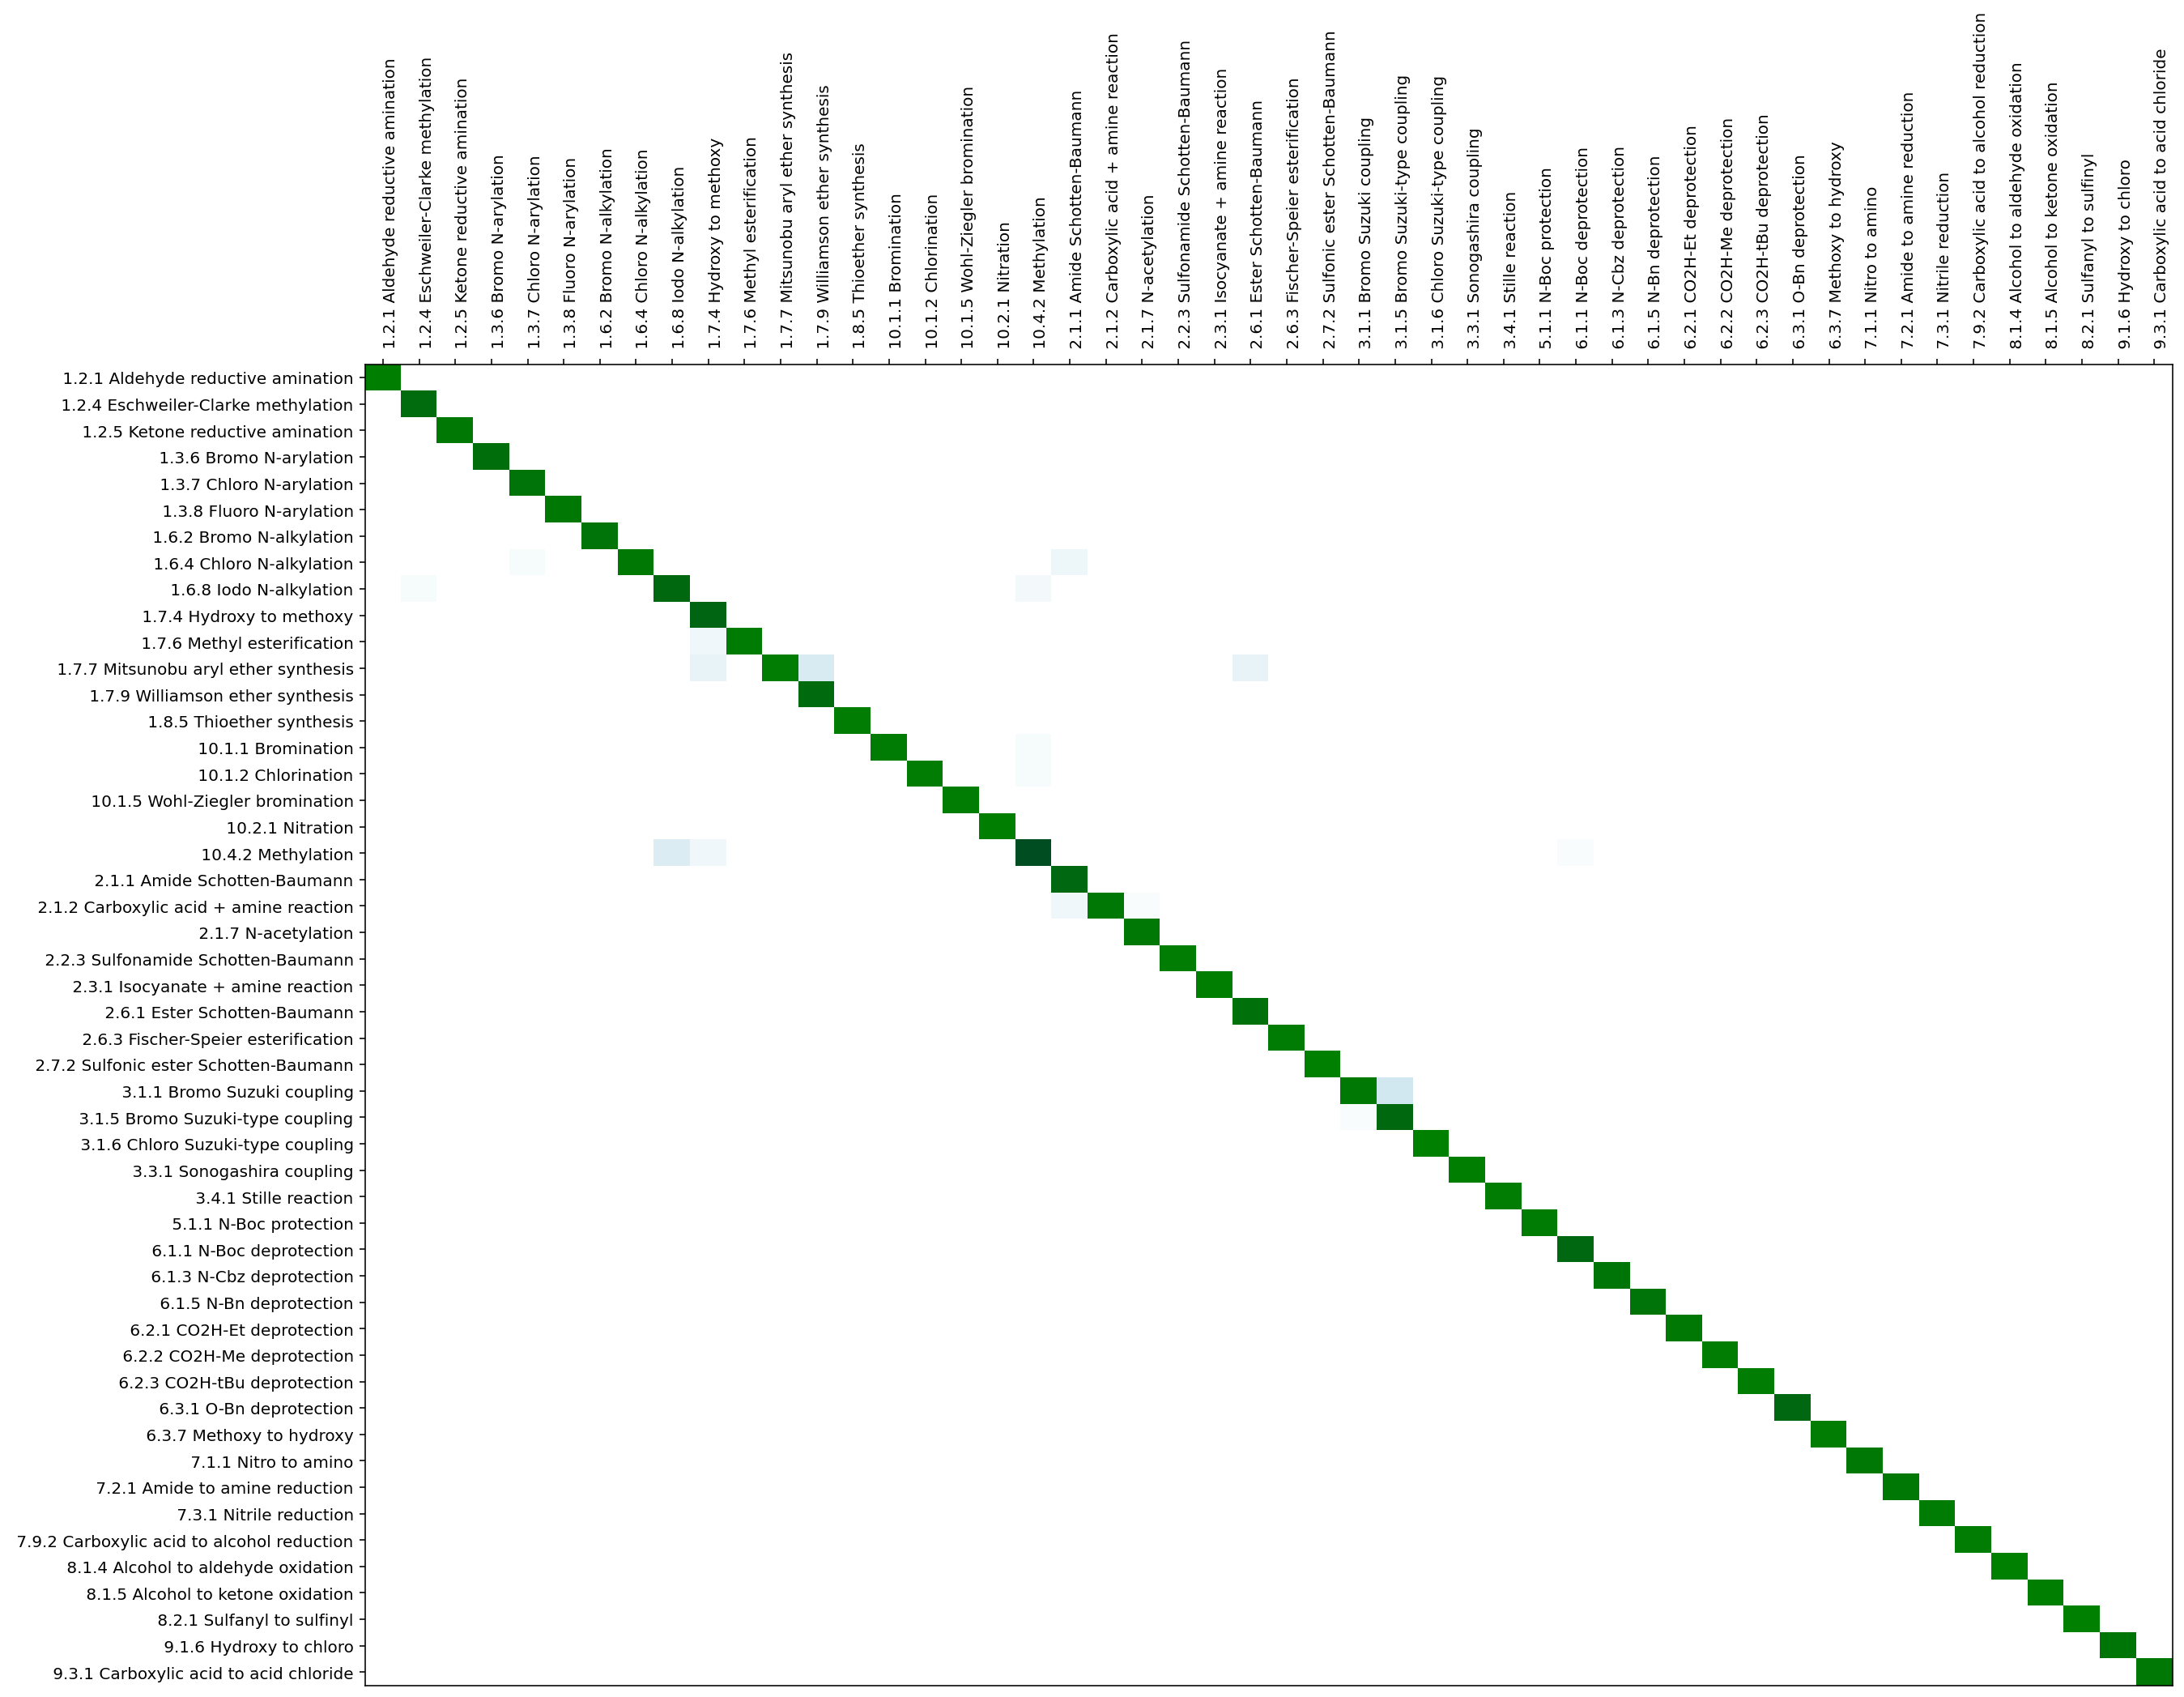

In [98]:
rowCounts = np.array(sum(cmat_rFP_agentFeature,1),dtype=float)
cmat_percent = cmat_rFP_agentFeature/rowCounts[:,None]

#zero all elements that are less than 1% of the row contents
ncm = cmat_percent*(cmat_percent>0.01)


fig, ax = plt.subplots(1,1, figsize=(20,15))
pax=ax.pcolor(ncm,cmap=cm.ocean_r)
ax.set_frame_on(True)

labels = [' %s %s'%(x,names_rTypes[x].strip()) for x in rtypes]
ax.set_yticks(np.arange(cmat_rFP_agentFeature.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(cmat_rFP_agentFeature.shape[1])+0.5, minor=False)

ax.set_xticklabels(labels, minor=False, rotation=90, horizontalalignment='left') 
ax.set_yticklabels(labels, minor=False)
        
# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.show()